In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import yaml
import ast
from tqdm import tqdm
from datetime import datetime
from scipy import stats
from scipy.stats import norm
import json

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
test.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [4]:
train.iloc[1767]["tagline"]

nan

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [6]:
miss = train.isnull().sum()
miss= miss[miss > 0]
miss.sort_values(inplace=True)
miss

poster_path                 1
runtime                     2
genres                      7
overview                    8
cast                       13
crew                       16
spoken_languages           20
production_countries       55
production_companies      156
Keywords                  276
tagline                   597
homepage                 2054
belongs_to_collection    2396
dtype: int64

In [7]:
train = train[[i for i in train.columns if i not in ["id", "belongs_to_collection", "overview", "poster_path","homepage", "title","original_title","Keywords"]]]    
test = test[[i for i in test.columns if i not in ["id", "belongs_to_collection", "overview", "poster_path", "tagline","homepage", "title","original_title","Keywords"]]]    

In [8]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 3000 rows and 15 columns
The test data has 4398 rows and 13 columns


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


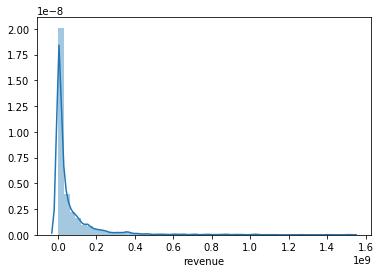

In [9]:

#Creating Distribution Plot
sns.distplot(train["revenue"])

The skewness of target is 0.005468456321668449


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


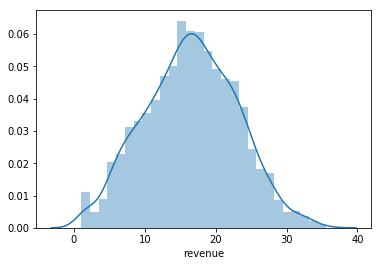

In [10]:
#Determining Skewness
target= np.power(train['revenue'], 0.169)
print ("The skewness of target is {}".format(target.skew()))
sns.distplot(target)


In [11]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print("There are {} numeric features and {} categorical features".format(numeric_data.shape[1], cat_data.shape[1]))

There are 4 numeric features and 11 categorical features


In [12]:
train.status = train.status.fillna("released")

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
budget                  3000 non-null int64
genres                  2993 non-null object
imdb_id                 3000 non-null object
original_language       3000 non-null object
popularity              3000 non-null float64
production_companies    2844 non-null object
production_countries    2945 non-null object
release_date            3000 non-null object
runtime                 2998 non-null float64
spoken_languages        2980 non-null object
status                  3000 non-null object
tagline                 2403 non-null object
cast                    2987 non-null object
crew                    2984 non-null object
revenue                 3000 non-null int64
dtypes: float64(2), int64(2), object(11)
memory usage: 351.6+ KB


In [14]:
numeric_data

,budget,popularity,runtime,revenue
0,14000000,6.575393,93.0,12314651
1,40000000,8.248895,113.0,95149435
2,3300000,64.299990,105.0,13092000
3,1200000,3.174936,122.0,16000000
4,0,1.148070,118.0,3923970
5,8000000,0.743274,83.0,3261638
6,14000000,7.286477,92.0,85446075
7,0,1.949044,84.0,2586511
8,0,6.902423,100.0,34327391
9,6000000,4.672036,91.0,18750246


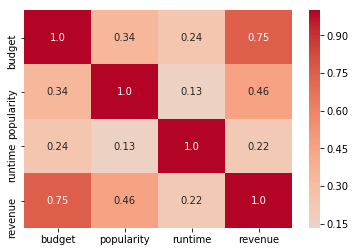

In [15]:
corr= numeric_data.corr()
sns.heatmap(corr, annot=True, fmt='.2', center=0.0, cmap='coolwarm')

In [16]:
print (corr['revenue'].sort_values(ascending=False)[:], '\n')

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
Name: revenue, dtype: float64 



In [17]:
cat_data.describe()

,genres,imdb_id,original_language,production_companies,production_countries,release_date,spoken_languages,status,tagline,cast,crew
count,2993,3000,3000,2844,2945,3000,2980,3000,2403,2987,2984
unique,872,3000,36,2383,321,2398,401,2,2400,2975,2984
top,"[{'id': 18, 'name': 'Drama'}]",tt0405296,en,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,[],"[{'credit_id': '52fe4269c3a36847f801c94f', 'de..."
freq,266,1,2575,51,1752,5,1817,2996,3,13,1


In [18]:
print(train[["original_language", "revenue"]].groupby(['original_language'], as_index=False).mean().sort_values(by='revenue', ascending=False))

   original_language       revenue
7                 en  7.466591e+07
35                zh  7.037637e+07
32                tr  5.166341e+07
17                ja  3.065180e+07
2                 cn  2.977289e+07
13                hi  2.534637e+07
5                 de  2.053090e+07
11                fr  1.713257e+07
16                it  1.641513e+07
24                pl  1.501083e+07
30                ta  1.470625e+07
18                ko  1.377670e+07
4                 da  1.175709e+07
29                sv  1.163051e+07
12                he  1.112585e+07
25                pt  1.087902e+07
8                 es  8.564790e+06
31                te  8.320425e+06
6                 el  8.000000e+06
27                ru  6.929453e+06
20                mr  4.400000e+06
21                nb  4.159678e+06
15                id  2.627209e+06
22                nl  1.959667e+06
10                fi  1.471932e+06
0                 ar  1.347747e+06
19                ml  1.315000e+06
23                no

In [19]:
sp_pivot= train.pivot_table(index='original_language', values='revenue', aggfunc=np.mean).sort_values(by= 'revenue', ascending=False)
sp_pivot

,revenue
original_language,
en,7.466591e+07
zh,7.037637e+07
tr,5.166341e+07
ja,3.065180e+07
cn,2.977289e+07
hi,2.534637e+07
de,2.053090e+07
fr,1.713257e+07
it,1.641513e+07


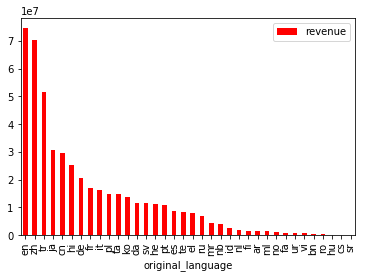

In [20]:
sp_pivot.plot(kind='bar', color='red')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:2932: RuntimeWarning: divide by zero encountered in double_scalars
  msw = sswn / float(dfwn)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

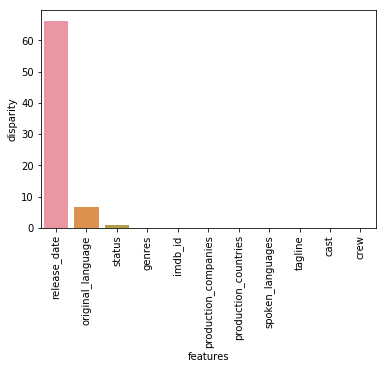

In [21]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['revenue'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['revenue'] = train.revenue.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


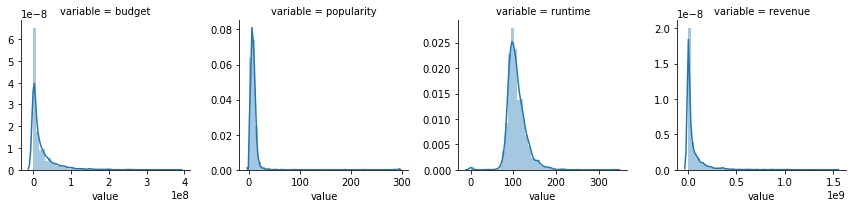

In [22]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
#create box plot
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='revenue', value_vars=cat)
g = sns.FacetGrid (p, col='revenue', col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, 'value','revenue')
g

In [ ]:
#Creating Jointplot
sns.jointplot(x=train['budget'], y=train['revenue'])

In [ ]:
d1=dict.fromkeys(set(train["original_language"].values),0 )
for i in train["original_language"].values:
    d1[i]+=1

In [ ]:
X = train.dropna(axis=1)
X = X.drop(["spoken_languages","release_date","imdb_id"],axis=1)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

y=X["revenue"]
X=X[X.columns[:-1]]
for i in ["original_language","status"]:
    X[i]=pd.get_dummies(X[i])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train,y_train)
clf.feature_importances_

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rndtree

In [ ]:
for i in range(1,50):
    model1=rndtree(max_depth=20)
    model1.fit(X_train,y_train)
    print(model1.score(X_test,y_test))


In [ ]:
model1.score(X_test,y_test)

In [ ]:
train["budget"].fillna(train["budget"].median(), inplace=True)
test["budget"].fillna(test["budget"].median(), inplace=True)
train["popularity"].fillna(train["popularity"].median(), inplace=True)
test["popularity"].fillna(test["popularity"].median(), inplace=True)
train["runtime"].fillna(train["runtime"].median(), inplace=True)
test["runtime"].fillna(test["runtime"].median(), inplace=True)

train["production_countries"].fillna(train["production_countries"].mode(), inplace=True)
train["production_companies"].fillna(train["production_companies"].mode(), inplace=True)
test["spoken_languages"].fillna('en', inplace=True)


In [ ]:
numerical_data = train[['budget', 'popularity', 'runtime']]
g = sns.PairGrid(numerical_data)
g = g.map_diag(plt.hist, bins=10)
g = g.map_offdiag(plt.scatter, s=5, alpha=.9, linewidth=.5)
g = g.add_legend()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [ ]:
import re
str_id=[i for i in train["genres"]]
ids=[]
for i in str_id:
    ids.append([int(i[m.start()+5:m.start()+7]) for m in re.finditer("id", i)])